# Zestaw zadań: Rozwiązywanie równań nieliniowych
## Zadanie 2
### Autor: Artur Gęsiarz

In [161]:
import numpy as np
import matplotlib.pyplot as plt

### Funkcje iteracyjne

In [162]:
def function(x):
    return x ** 2 - 3 * x + 2

In [163]:
def function_g1(x):
    return (x ** 2 + 2) / 3

In [164]:
def function_g2(x):
    return np.sqrt(3 * x - 2)

In [165]:
def function_g3(x):
    return 3 - 2 / x

In [166]:
def function_g4(x):
    return (x ** 2 - 2) / (2 * x - 3)

In [ ]:
### Zbieżność schematów

### Pochodne funkcji iteracyjnych w punkcie x = 2

In [167]:
g_primes = [4/3, 3/4, 1/2, 4]

### Dokladnie rozwiazanie

In [168]:
x_true = 2

### Funkcja obliczajca blad bezwzgledny

In [169]:
def absolute_error(x_k):
    return abs(x_k - x_true)

### Funkcja obliczajca rząd zbieznosci

In [170]:
def convergence_order(errors):
    orders = []
    for i in range(1, len(errors) - 1):
        order = np.log(errors[i] / errors[i + 1]) / np.log(errors[i - 1]/ errors[i] )
        orders.append(order)
    return orders

### Zbieznosc oraz rzad zbieznosci schematow iteracyjnych odpowiadajacym funkcja $g_i$

In [171]:
#todo

### Funkcja wykonujaca iteracje i zbierajaca wyniki

In [172]:
def iterate_function(g):
    x_k = 1.5
    errors = []
    for i in range(10):
        x_k = g(x_k)
        if x_k is not None:
            errors.append(absolute_error(x_k))
        else: break
    convergence_orders = convergence_order(errors)
    return errors, convergence_orders

### Wykonanie iteracji dla kazdej funkcji iteracyjnej

In [173]:
errors_g1, orders_g1 = iterate_function(function_g1)
errors_g2, orders_g2 = iterate_function(function_g2)
errors_g3, orders_g3 = iterate_function(function_g3)
errors_g4, orders_g4 = iterate_function(function_g4)

None
None
None
None
None
None
None
None
None
None
[] []


### Wykres błedu wzglednego w zaleznosci od numeru iteracji

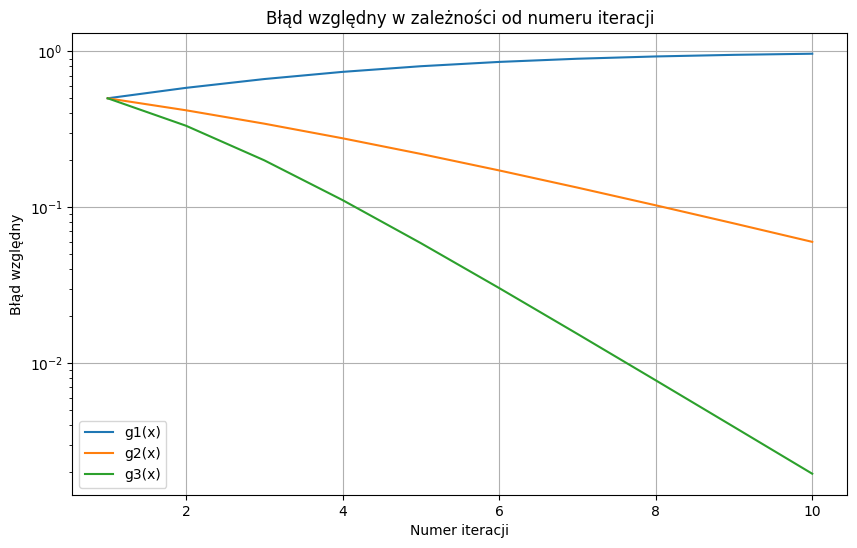

In [174]:
iterations = np.arange(1,11)
plt.figure(figsize=(10, 6))
plt.semilogy(iterations, errors_g1, label='g1(x)')
plt.semilogy(iterations, errors_g2, label='g2(x)')
plt.semilogy(iterations, errors_g3, label='g3(x)')
#plt.semilogy(iterations, errors_g4, label='g4(x)')
plt.title('Błąd względny w zależności od numeru iteracji')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

### Wykres błedu wzglednego tylko dla metod zbieznych

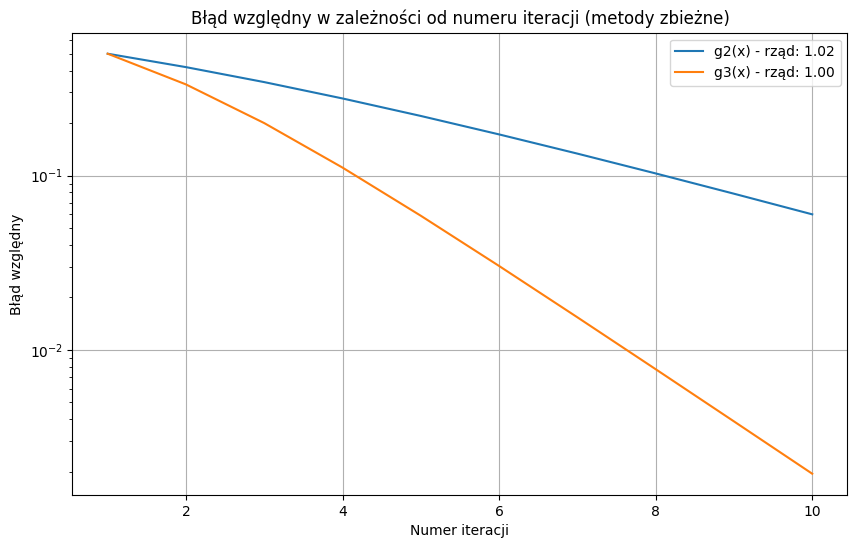

In [175]:
plt.figure(figsize=(10, 6))
if g_primes[0] < 1:
    plt.semilogy(iterations, errors_g1, label='g1(x) - rząd: {:.2f}'.format(orders_g1[-1]))
if g_primes[1] < 1:
    plt.semilogy(iterations, errors_g2, label='g2(x) - rząd: {:.2f}'.format(orders_g2[-1]))
if g_primes[2] < 1:
    plt.semilogy(iterations, errors_g3, label='g3(x) - rząd: {:.2f}'.format(orders_g3[-1]))
if g_primes[3] < 1:
    if errors_g4:
        plt.semilogy(iterations, errors_g4, label='g4(x) - rząd: {:.2f}'.format(orders_g4[-1]))
plt.title('Błąd względny w zależności od numeru iteracji (metody zbieżne)')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

# g4 powinien byc zbiezny ! - naprawic blad